# HDR

In [1]:
import numpy as np
import cv2
import random
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
src = cv2.imread('../datas/hdr00.jpg')
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

## Step 1:加载不同曝光时间长度图片

In [10]:
def readImagesAndTimes():
  # List of exposure times
    times = np.array([ 1/30.0], dtype=np.float32)
   
  # List of image filenames
    filenames = ["../datas/hdr00.jpg"]
    images = []
    for filename in filenames:
        im = cv2.imread(filename)
        images.append(im)
   
    return images, times

## Step 2:对齐图像

In [11]:
images,times = readImagesAndTimes()

In [12]:
# Align input images
alignMTB = cv2.createAlignMTB()
alignMTB.process(images, images)

## Step 3:恢复相机影响函数

In [13]:
# Obtain Camera Response Function (CRF)
calibrateDebevec = cv2.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(images, times)

## Step 4:合并图像

In [14]:
# Merge images into an HDR linear image
mergeDebevec = cv2.createMergeDebevec()
hdrDebevec = mergeDebevec.process(images, times, responseDebevec)
# Save HDR image.
cv2.imwrite("../temp/hdrDebevec.hdr", hdrDebevec)

True

## Step 5: Tone mapping

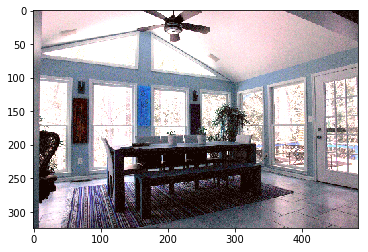

In [22]:
# Tonemap using Drago's method to obtain 24-bit color image
tonemapDrago = cv2.createTonemapDrago(1.0, 0.7)
ldrDrago = tonemapDrago.process(hdrDebevec)
ldrDrago = 3 * ldrDrago
cv2.imwrite("../temp/ldr-Drago.jpg", ldrDrago * 255)
ldrDrago = ldrDrago * 255
ldrDrago = np.clip(ldrDrago,0,255).astype(np.uint8)
plt.imshow(ldrDrago)

In [16]:
# Tonemap using Durand's method obtain 24-bit color image
tonemapDurand = cv2.createTonemapDurand(1.5,4,1.0,1,1)
ldrDurand = tonemapDurand.process(hdrDebevec)
ldrDurand = 3 * ldrDurand
cv2.imwrite("../temp/ldr-Durand.jpg", ldrDurand * 255)

True

In [17]:
# Tonemap using Reinhard's method to obtain 24-bit color image
tonemapReinhard = cv2.createTonemapReinhard(1.5, 0,0,0)
ldrReinhard = tonemapReinhard.process(hdrDebevec)
cv2.imwrite("../temp/ldr-Reinhard.jpg", ldrReinhard * 255)

True

In [18]:
# Tonemap using Mantiuk's method to obtain 24-bit color image
tonemapMantiuk = cv2.createTonemapMantiuk(2.2,0.85, 1.2)
ldrMantiuk = tonemapMantiuk.process(hdrDebevec)
ldrMantiuk = 3 * ldrMantiuk
cv2.imwrite("../temp/ldr-Mantiuk.jpg", ldrMantiuk * 255)

True

参考

[1]. https://www.learnopencv.com/high-dynamic-range-hdr-imaging-using-opencv-cpp-python/